# Exercise 2

In [29]:
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt

1. Choose a value for the probability parameter p in the geometric distribution and simulate 10,000 outcomes. You can experiment with a small, moderate and large value if you like.

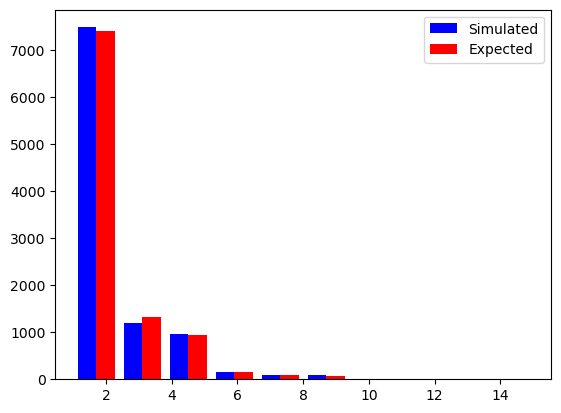

In [30]:
n=10000
p=0.5
u = np.random.uniform(0,1,n)

def gd(x,p):
    res = np.zeros(len(x))
    for i in range(len(x)):
        res[i] = math.floor(math.log(x[i])/math.log(1-p))+1
    return res

gd_sim = gd(u,p)
gd_exp = stats.geom.rvs(p, size=n)

plt.hist([gd_sim,gd_exp], label=["Simulated","Expected"], color=["blue", "red"])
plt.legend(loc='upper right')
plt.show()

2. Simulate the 6 point distribution with

In [31]:
p = np.array([7/48, 5/48, 1/8, 1/16, 1/4, 5/16])

2. (a) by applying a direct (crude) method

In [32]:
def crude(p,n):
    f = np.cumsum(p)
    res = []
    while len(res) < n:
        u = np.random.uniform(0,1)
        for j in range(len(p)):
            if u <= f[j]:
                res.append(j+1)
                break;
    return res

2. (b) by using the rejection method

In [33]:
def rejection(p,n):
    k = len(p)
    q = np.array([1/k for i in range(k)])
    c = max(p/q)
    res = []
    while len(res) < n:
        u1 = np.random.uniform(0,1)
        y = math.floor(k*u1)+1
        u2 = np.random.uniform(0,1)
        if u2 <= (p[y-1]/c*q[y-1]):
            res.append(y)
    return res

2. (c) by using the Alias method

In [40]:
def alias(p,n):
    k = len(p)
    L = np.arange(1,k+1)
    F = k*p
    G = np.argwhere(F >= 1) 
    S = np.argwhere(F <= 1)
    
    while len(S) != 0:
        i = G[0]
        j = S[0]
        L[j] = i
        F[i] = F[i] - (1-F[j])
        if F[i] < 1 - 0.001:
            G = np.delete(G,0)
            S = np.append(S,i)
        S = np.delete(S,0)
    
    res = []
    while len(res) < n:
        u1 = np.random.uniform(0,1)
        y = math.floor(k*u1)+1
        u2 = np.random.uniform(0,1)
        if u2 <= F[y-1]:
            res.append(y-1)
        else:
            res.append(L[y-1])  
    return [x + 1 for x in res]

3. Compare the three different methods using adequate criteria, then discuss the results.

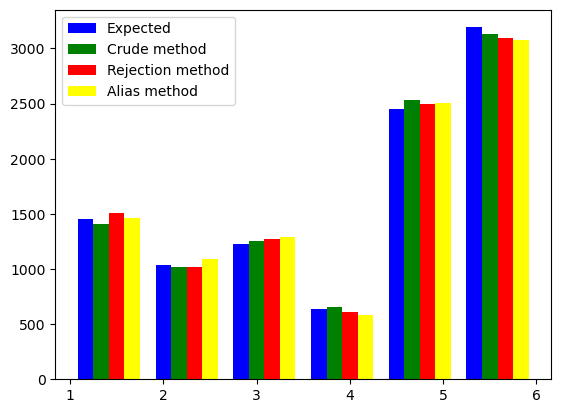

0.967081996278138 0.7229401381401557 0.4568717692969701


In [41]:
exp = stats.rv_discrete(values=(np.arange(1,7), p)).rvs(size=n)
crude_res = crude(p,n)
rej_res = rejection(p,n)
alias_res = alias(p,n)
plt.hist([exp, crude_res,rej_res,alias_res], bins=6, label=["Expected", "Crude method", "Rejection method", "Alias method"], 
         color=["blue", "green", "red", "yellow"])
plt.legend(loc='upper left')
plt.show()
ts1, pvalue1 = stats.kstest(exp, crude_res)
ts2, pvalue2 = stats.kstest(exp, rej_res)
ts3, pvalue3 = stats.kstest(exp, alias_res)
print(pvalue1,pvalue2,pvalue3)

When performing the Kolmogorov-Smirnov test to test whether the simulated values from the three methods follow the expected distribution, the p-values are all greater than the chosen significance level $\alpha =$ 0.05 which indicates that there is not enough evidence to reject the null hypothesis of significant statistical difference between the sample and theoretical distributions. Thus, we can conclude that the distributions are not significantly different.

4. Give recommendations of how to choose the best suited method in different settings, i.e., discuss the advantages and drawbacks of each method. If time permits substantiate by running experiments.

For a static distribution of a small number of discrete values we expect that the Alias method is best suited for this problem. The crude method should also be satisfactory in this case and we expect the rejection method to be outperformed in the given scenario. The rejection method will provide a strong candidate when there are many possible acceptable descrete variables and the probability distrubution has a complex form. In contrast the crude method aside from being the simplest demands many calculations for a large number of variables and lastly the alias method will be the fastest having however preworked its required tables.